# Predicting House Prices In Bengaluru

#### Import data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns' , None)
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.shape , test.shape

((13320, 9), (1480, 9))

In [4]:
train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
test.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
train.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
for i in train.columns:
    print(" {} has {} unique values".format(i,train[i].nunique()))

 area_type has 4 unique values
 availability has 81 unique values
 location has 1305 unique values
 size has 31 unique values
 society has 2688 unique values
 total_sqft has 2117 unique values
 bath has 19 unique values
 balcony has 4 unique values
 price has 1994 unique values


In [10]:
train.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### Data pre-processing
###### Since society feature has too much of  missing values so dropping the feature would be a better choice.

In [11]:
train.drop(columns=["society"] , axis =1 , inplace =True)
test.drop(columns=["society", "price"] , axis =1 , inplace =True)

In [12]:
# total_sqft contained 90% of data in sqft but 10% of data was also present in other area measuring units so created a function  to change the other measuring units to sqft

def clean_sqft(num):
    if "-" in num:
        num1=num.split("-")[0].strip()
        num1=float(num1)
        num2=num.split("-")[1].strip()
        num2=float(num2)
        sqft = ((num1+num2)/2)
        return sqft
    elif "Sq. Meter" in num:
        num = re.sub(r"Sq. Meter","",num).strip()
        num=float(num)
        num = num*10.764
        return num
    elif "Perch" in num:
        num = re.sub(r"Perch","",num).strip()
        num=float(num)
        num = num*272
        return num
    elif "Acres" in num:
        num = re.sub(r"Acres","",num).strip()
        num=float(num)
        num = num*43560
        return num
    elif "Cents" in num:
        num = re.sub(r"Cents","",num).strip()
        num=float(num)
        num = num*435.6
        return num
    elif "Sq. Yards" in num:
        num = re.sub(r"Sq. Yards","",num).strip()
        num=float(num)
        num = num*9
        return num
    elif "Guntha" in num:
        num = re.sub(r"Guntha","",num).strip()
        num=float(num)
        num = num*1088.98
        return num
    elif "Grounds" in num:
        num = re.sub(r"Grounds","",num).strip()
        num=float(num)
        num = num*2400
        return num
    else:
        return num
    
train["total_sqft"]=train["total_sqft"].apply(clean_sqft).astype('float')
test["total_sqft"]=test["total_sqft"].apply(clean_sqft).astype('float')

In [13]:
train["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
# Changed Bedroom to BHK

train["size"]=train["size"].str.replace("Bedroom","BHK")
test["size"]=test["size"].str.replace("Bedroom","BHK")

In [15]:
train = train.dropna(axis=0, subset=['location'])

In [16]:
train["size"].fillna("2 BHK",inplace = True)
test["size"].fillna("2 BHK",inplace = True)


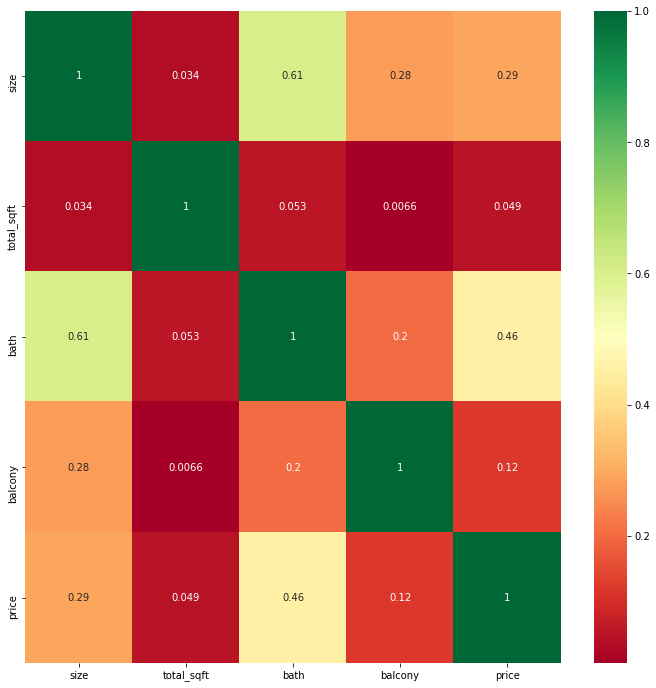

In [17]:
train_copy=train.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_copy["size"]=le.fit_transform(train_copy["size"])
plt.figure(figsize=(12,12))
sns.heatmap(train_copy.corr(),annot = True , cmap="RdYlGn")

###### From the corelation matrix it is more clear that bath and balcony are more dependent on size compared to total_sqft so for missing values grouped by size to get missing bath and balcony value

In [18]:
train['bath'] = train.groupby(['size']).transform(lambda x: x.fillna(x.median()))['bath']
train['balcony'] = train.groupby(['size']).transform(lambda x: x.fillna(x.median()))['balcony']

test['bath'] = test.groupby(['size']).transform(lambda x: x.fillna(x.median()))['bath']
test['balcony'] = test.groupby(['size']).transform(lambda x: x.fillna(x.median()))['balcony']

In [19]:
train[train["balcony"].isnull()].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19 BHK,2000.0,16.0,NaN,490.0
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16 BHK,10000.0,16.0,NaN,550.0
11559,Plot Area,18-Apr,1Kasavanhalli,18 BHK,1200.0,18.0,NaN,200.0


###### balcony still contain some missing values and after visualization found from the data that other high BHK houses also contains 0 as balcony value so inserted 0 in the missing values

In [20]:
train["balcony"].fillna(0,inplace = True)
test["balcony"].fillna(0,inplace = True)

In [21]:
cat_columns=['area_type', 'availability', 'size', 'bath','balcony']
numerical_features = ['total_sqft']

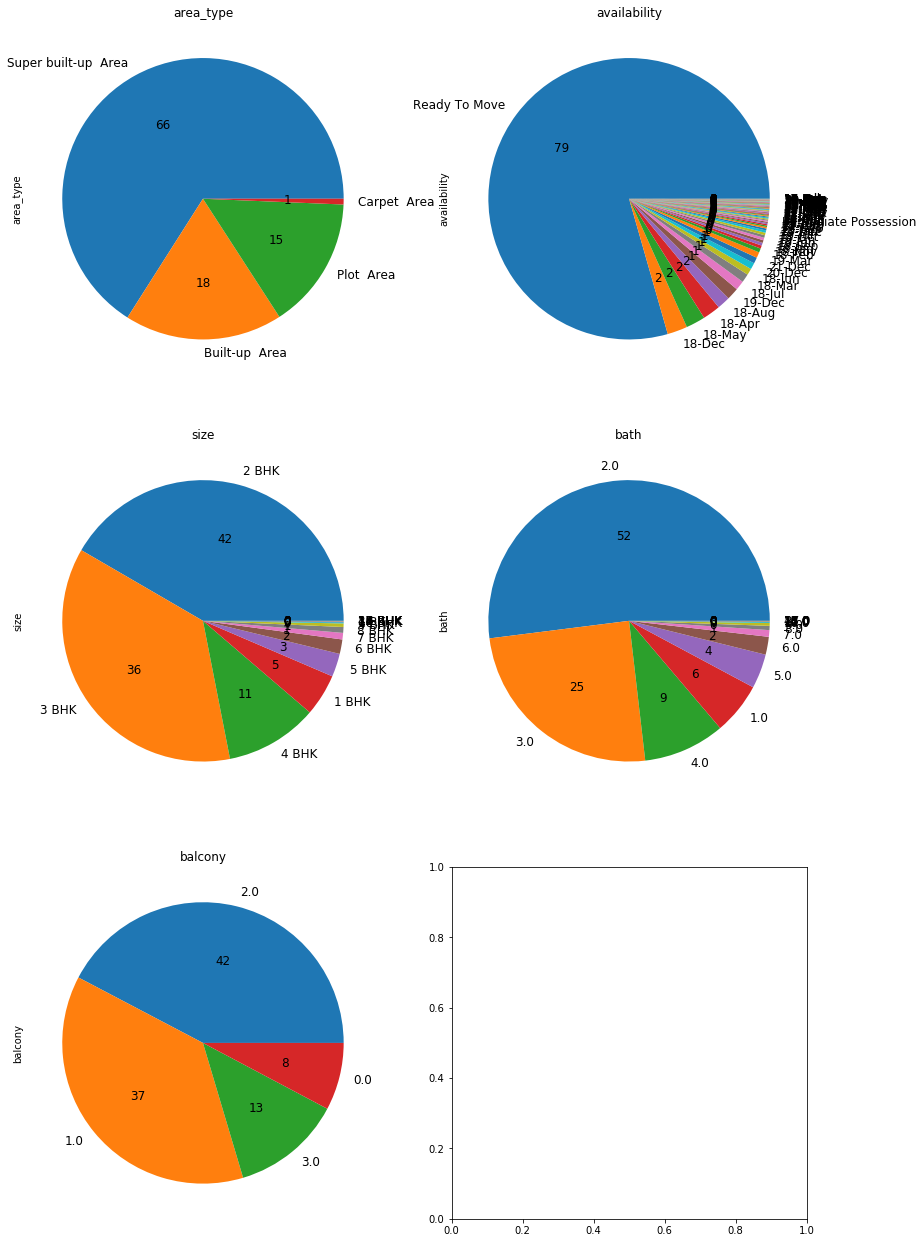

In [22]:
fig, axis = plt.subplots(3,2, figsize=(14,22))
axes = [ax for axes_row in axis for ax in axes_row]

for i , c in enumerate(cat_columns):
    train[c].value_counts().plot(kind="pie",title=c,autopct="%.0f",fontsize=12,ax=axes[i])

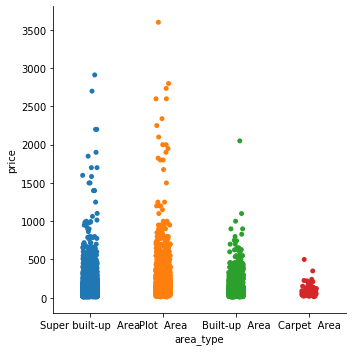

In [23]:
sns.catplot(data=train,x="area_type",y="price")

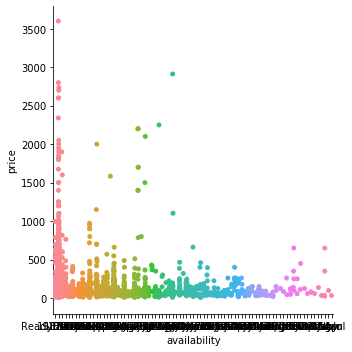

In [24]:
sns.catplot(data=train,x="availability",y="price")

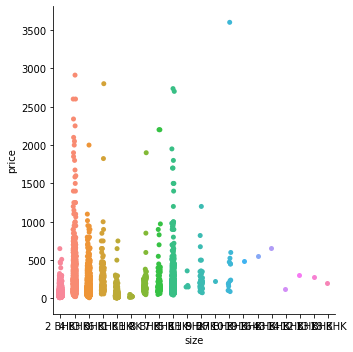

In [25]:
sns.catplot(data=train,x="size",y="price")

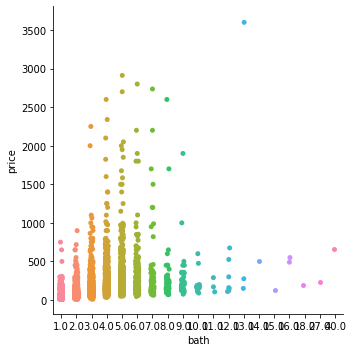

In [26]:
sns.catplot(data=train,x="bath",y="price")

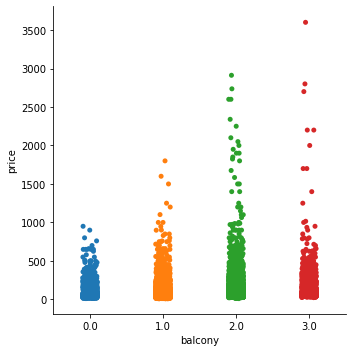

In [27]:
sns.catplot(data=train,x="balcony",y="price")

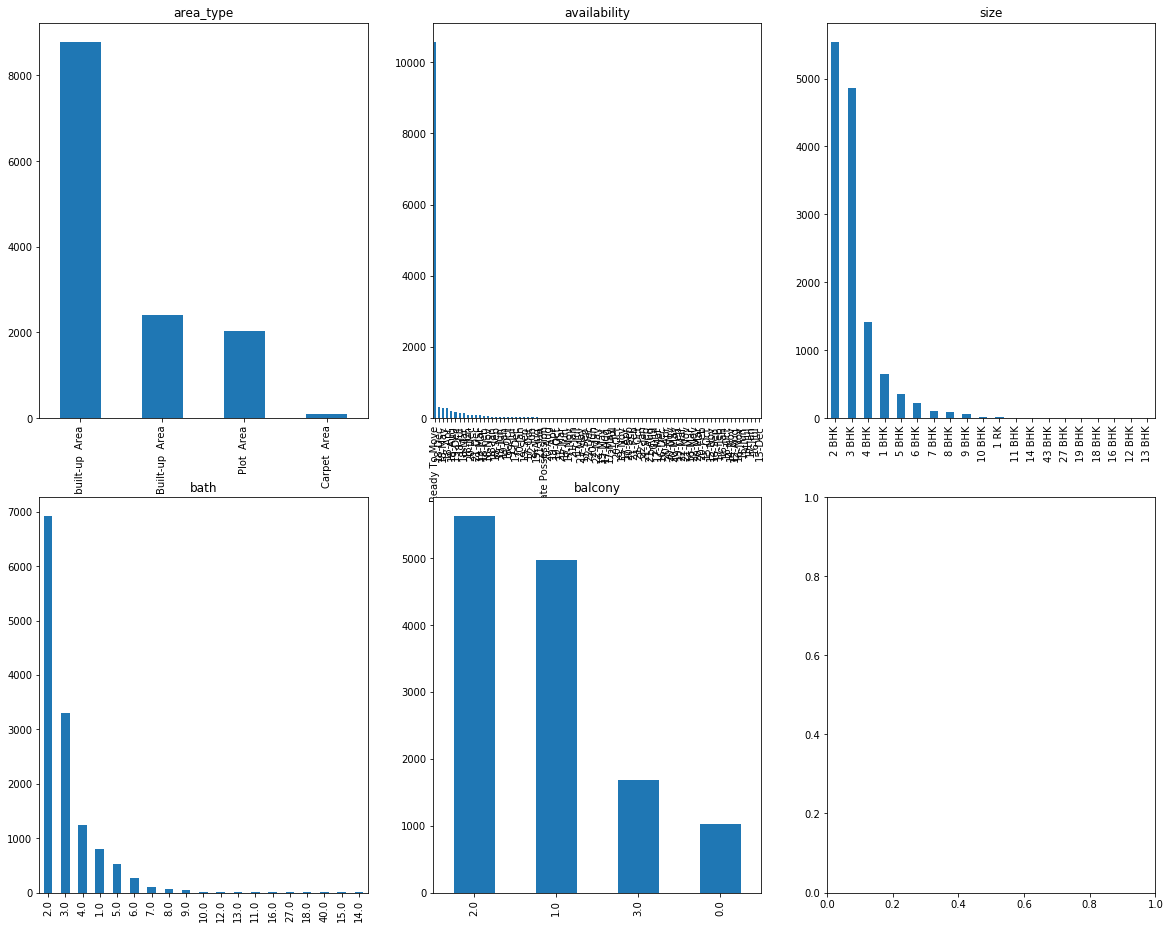

In [28]:
fig,axes=plt.subplots(2,3,figsize=(20,16))
axis=[ax for axis_row in axes for ax in axis_row]

for i,c in enumerate(cat_columns):
    train[c].value_counts().plot(kind="bar",ax=axis[i],title=c)

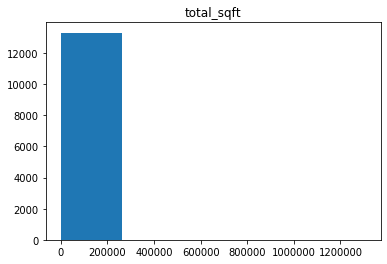

In [29]:
for c in numerical_features:
    plt.hist(train[c],bins=5) 
    plt.title(c) 
    plt.show()

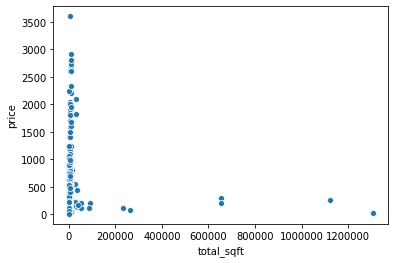

In [30]:
#fig,axis=plt.subplots(3,1,figsize=(12,16))
#axes=[ax for ax in axis]

#for i,c in enumerate(numerical_features):
#    sns.scatterplot(data=train,x=c,y="price",ax=axes[i])

plt.ticklabel_format(style = 'plain')
sns.scatterplot(data = train, x = 'total_sqft', y = "price")


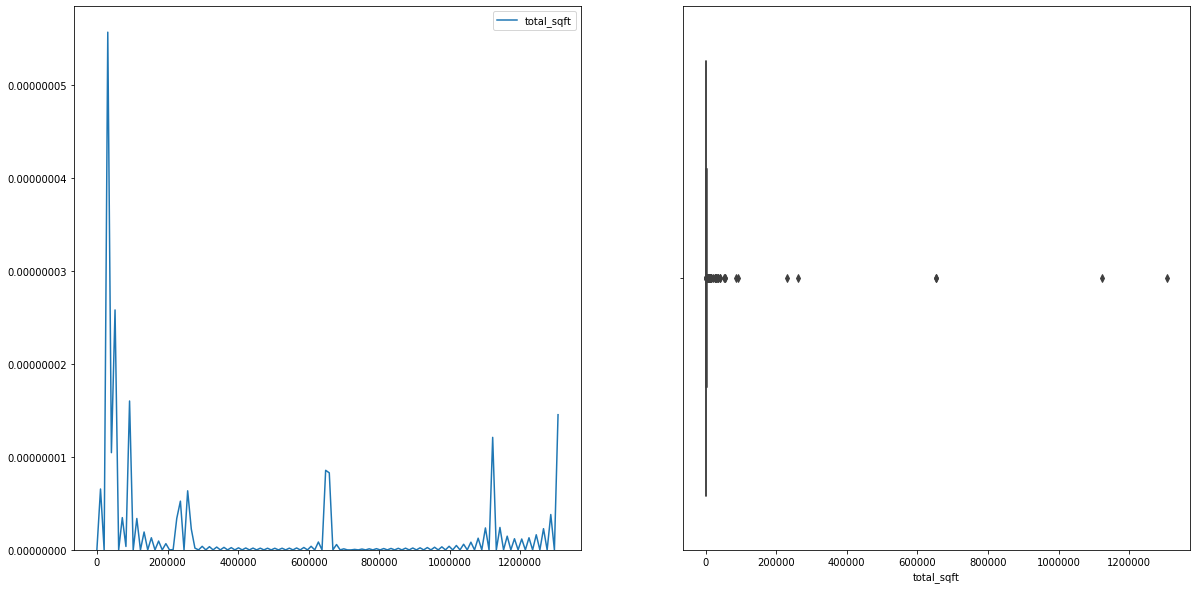

In [31]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
axx = ax.flatten()


sns.kdeplot(train['total_sqft'], ax = axx[0])
axx[0].ticklabel_format(style = 'plain')

sns.boxplot(train['total_sqft'], ax = axx[1])
axx[1].ticklabel_format(style = 'plain', axis = 'x')


In [32]:
train.describe()

,total_sqft,bath,balcony,price
count,1.331900e+04,13319.000000,13319.000000,13319.000000
mean,1.911543e+03,2.694046,1.598393,112.567621
std,1.727252e+04,1.340180,0.805112,148.977089
min,1.000000e+00,1.000000,0.000000,8.000000
25%,1.100000e+03,2.000000,1.000000,50.000000
50%,1.277000e+03,2.000000,2.000000,72.000000
75%,1.680000e+03,3.000000,2.000000,120.000000
max,1.306800e+06,40.000000,3.000000,3600.000000


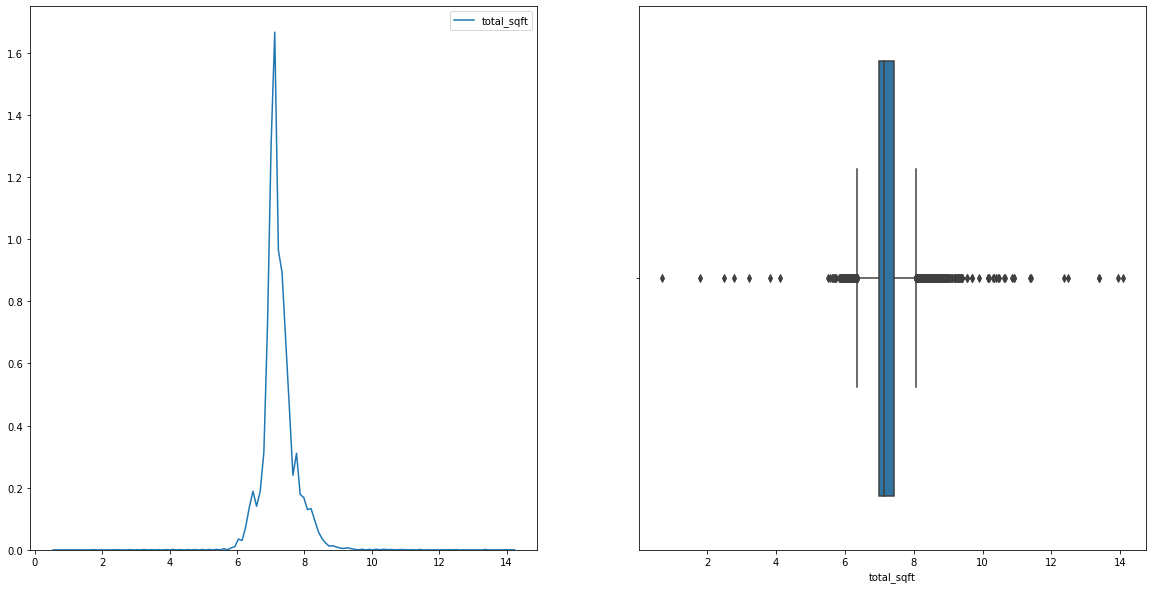

In [33]:
train_copy=train.copy()

train_copy["total_sqft"]=np.log1p(train_copy["total_sqft"])

f, ax = plt.subplots(1, 2, figsize=(20, 10))
axx = ax.flatten()


sns.kdeplot(train_copy['total_sqft'], ax = axx[0])
axx[0].ticklabel_format(style = 'plain')

sns.boxplot(train_copy['total_sqft'], ax = axx[1])
axx[1].ticklabel_format(style = 'plain', axis = 'x')

In [34]:
train.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [35]:
test.head()

,area_type,availability,location,size,total_sqft,bath,balcony
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,1225.0,2.0,2.0
1,Plot Area,Ready To Move,Akshaya Nagar,9 BHK,2400.0,9.0,2.0
2,Plot Area,18-Apr,Hennur Road,4 BHK,1650.0,5.0,2.0
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,1322.0,3.0,1.0
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,1161.0,2.0,1.0


In [36]:
train.shape

(13319, 8)

In [37]:
# Removed the data which have price more then 2500 as this data can act more as a outlier and can affect the over all model for the prediction value

train=train[train["price"]<2500]

In [38]:
train.shape

(13312, 8)

In [39]:
df=train.append(test,ignore_index=True)

In [40]:
df.shape

(14792, 8)

In [41]:
df.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 BHK,1020.0,6.0,2.0,370.00


In [42]:
df["BHK_or_RK"]=df["size"].str.split(" ").str[1]
df["size"]=df["size"].str.split(" ").str[0]

In [43]:
df["availability"]=np.where(df["availability"]=="Ready To Move",1,0)

In [44]:
location_count=df["location"].value_counts().to_dict()

In [45]:
location_count

{'Whitefield': 591,
 'Sarjapur  Road': 437,
 'Electronic City': 337,
 'Kanakpura Road': 298,
 'Thanisandra': 277,
 'Yelahanka': 226,
 'Uttarahalli': 208,
 'Hebbal': 197,
 'Raja Rajeshwari Nagar': 191,
 'Marathahalli': 189,
 'Hennur Road': 176,
 '7th Phase JP Nagar': 167,
 'Bannerghatta Road': 162,
 'Haralur Road': 159,
 'Electronic City Phase II': 143,
 'Rajaji Nagar': 117,
 'Chandapura': 114,
 'Bellandur': 104,
 'Hoodi': 103,
 'KR Puram': 100,
 'Electronics City Phase 1': 100,
 'Begur Road': 94,
 'Harlur': 91,
 'Yeshwanthpur': 89,
 'Sarjapur': 87,
 'Kasavanhalli': 86,
 'Jakkur': 84,
 'Old Madras Road': 81,
 'Hormavu': 81,
 'Koramangala': 80,
 'Ramamurthy Nagar': 80,
 'Hosa Road': 80,
 'Banashankari': 79,
 'Kengeri': 77,
 'Varthur': 77,
 'JP Nagar': 77,
 'Akshaya Nagar': 73,
 'Kaggadasapura': 71,
 'Malleshwaram': 70,
 'TC Palaya': 67,
 'Nagarbhavi': 67,
 'Kothanur': 67,
 'Thigalarapalya': 66,
 'Rachenahalli': 65,
 '8th Phase JP Nagar': 65,
 'Budigere': 61,
 'Jigani': 60,
 'Jalahalli': 

In [46]:
df["location_count"]=df["location"].map(location_count)

In [47]:
df["bath_balcony"]=df["bath"]+df["balcony"]

In [48]:
df["total_sqft"]=df["total_sqft"].astype("float")
df["size"]=df["size"].astype("float")
df["total_sqft/size"]=df["total_sqft"]//df["size"]

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
df["area_type"]=le.fit_transform(df["area_type"])
df["BHK_or_RK"]=le.fit_transform(df["BHK_or_RK"])

In [51]:
temp = df.groupby(['location']).agg({'area_type':['sum','min','max'],
                                           'availability':['count','sum'],
                                           'size':['count','sum','mean','min','max'],
                                           'total_sqft':['count','sum','mean','min','max'],
                                           'bath':['min','max','mean','sum','count'],
                                           'balcony':['min','max','mean','sum','count'],
                                           'location_count':['sum','min','max','mean','count'],
                                           'total_sqft/size': ['sum','min','max','mean','count']})

temp.columns = ['_'.join(x) for x in temp.columns]
df = pd.merge(df,temp,on=['location'],how='left')

df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_or_RK,location_count,bath_balcony,total_sqft/size,area_type_sum,area_type_min,area_type_max,availability_count,availability_sum,size_count,size_sum,size_mean,size_min,size_max,total_sqft_count,total_sqft_sum,total_sqft_mean,total_sqft_min,total_sqft_max,bath_min,bath_max,bath_mean,bath_sum,bath_count,balcony_min,balcony_max,balcony_mean,balcony_sum,balcony_count,location_count_sum,location_count_min,location_count_max,location_count_mean,location_count_count,total_sqft/size_sum,total_sqft/size_min,total_sqft/size_max,total_sqft/size_mean,total_sqft/size_count
0,3,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,0,143,3.0,528.0,269,0,3,143,50,143,341.0,2.384615,1.0,4.0,143,175733.50,1228.905594,545.0,6000.0,1.0,4.0,2.125874,304.0,143,0.0,3.0,1.328671,190.0,143,20449,143,143,143,143,74442.0,272.0,1500.0,520.573427,143
1,2,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,0,17,8.0,650.0,28,0,2,17,13,17,62.0,3.647059,3.0,5.0,17,45681.00,2687.117647,1555.0,4500.0,3.0,5.0,4.117647,70.0,17,0.0,3.0,1.823529,31.0,17,289,17,17,17,17,12532.0,518.0,1125.0,737.176471,17
2,0,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,0,208,5.0,480.0,514,0,3,208,193,208,562.0,2.701923,1.0,7.0,208,268918.55,1292.877644,400.0,4500.0,1.0,7.0,2.264423,471.0,208,0.0,3.0,1.605769,334.0,208,43264,208,208,208,208,103763.0,80.0,1125.0,498.860577,208
3,3,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,0,26,4.0,507.0,78,3,3,26,25,26,82.0,3.153846,3.0,4.0,26,45409.00,1746.500000,1506.0,2247.0,2.0,4.0,3.153846,82.0,26,1.0,3.0,1.384615,36.0,26,676,26,26,26,26,14382.0,502.0,631.0,553.153846,26
4,3,1,Kothanur,2.0,1200.0,2.0,1.0,51.00,0,67,3.0,600.0,172,0,3,67,60,67,192.0,2.865672,1.0,8.0,67,110830.00,1654.179104,627.0,9600.0,1.0,10.0,2.865672,192.0,67,0.0,3.0,1.850746,124.0,67,4489,67,67,67,67,39931.0,127.0,1920.0,595.985075,67


In [52]:
df.drop(columns=["location"],axis=1,inplace=True)

In [53]:
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,BHK_or_RK,location_count,bath_balcony,total_sqft/size,area_type_sum,area_type_min,area_type_max,availability_count,availability_sum,size_count,size_sum,size_mean,size_min,size_max,total_sqft_count,total_sqft_sum,total_sqft_mean,total_sqft_min,total_sqft_max,bath_min,bath_max,bath_mean,bath_sum,bath_count,balcony_min,balcony_max,balcony_mean,balcony_sum,balcony_count,location_count_sum,location_count_min,location_count_max,location_count_mean,location_count_count,total_sqft/size_sum,total_sqft/size_min,total_sqft/size_max,total_sqft/size_mean,total_sqft/size_count
0,3,0,2.0,1056.0,2.0,1.0,39.07,0,143,3.0,528.0,269,0,3,143,50,143,341.0,2.384615,1.0,4.0,143,175733.50,1228.905594,545.0,6000.0,1.0,4.0,2.125874,304.0,143,0.0,3.0,1.328671,190.0,143,20449,143,143,143,143,74442.0,272.0,1500.0,520.573427,143
1,2,1,4.0,2600.0,5.0,3.0,120.00,0,17,8.0,650.0,28,0,2,17,13,17,62.0,3.647059,3.0,5.0,17,45681.00,2687.117647,1555.0,4500.0,3.0,5.0,4.117647,70.0,17,0.0,3.0,1.823529,31.0,17,289,17,17,17,17,12532.0,518.0,1125.0,737.176471,17
2,0,1,3.0,1440.0,2.0,3.0,62.00,0,208,5.0,480.0,514,0,3,208,193,208,562.0,2.701923,1.0,7.0,208,268918.55,1292.877644,400.0,4500.0,1.0,7.0,2.264423,471.0,208,0.0,3.0,1.605769,334.0,208,43264,208,208,208,208,103763.0,80.0,1125.0,498.860577,208
3,3,1,3.0,1521.0,3.0,1.0,95.00,0,26,4.0,507.0,78,3,3,26,25,26,82.0,3.153846,3.0,4.0,26,45409.00,1746.500000,1506.0,2247.0,2.0,4.0,3.153846,82.0,26,1.0,3.0,1.384615,36.0,26,676,26,26,26,26,14382.0,502.0,631.0,553.153846,26
4,3,1,2.0,1200.0,2.0,1.0,51.00,0,67,3.0,600.0,172,0,3,67,60,67,192.0,2.865672,1.0,8.0,67,110830.00,1654.179104,627.0,9600.0,1.0,10.0,2.865672,192.0,67,0.0,3.0,1.850746,124.0,67,4489,67,67,67,67,39931.0,127.0,1920.0,595.985075,67


In [54]:
train_df = df[df['price'].isnull()!=True]
test_df = df[df['price'].isnull()==True]
test_df.drop('price', axis=1, inplace=True)

In [55]:
train_df.shape , test_df.shape

((13312, 46), (1480, 45))

In [56]:
train_df=np.log1p(train_df)
test_df=np.log1p(test_df)

In [57]:
train_df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,BHK_or_RK,location_count,bath_balcony,total_sqft/size,area_type_sum,area_type_min,area_type_max,availability_count,availability_sum,size_count,size_sum,size_mean,size_min,size_max,total_sqft_count,total_sqft_sum,total_sqft_mean,total_sqft_min,total_sqft_max,bath_min,bath_max,bath_mean,bath_sum,bath_count,balcony_min,balcony_max,balcony_mean,balcony_sum,balcony_count,location_count_sum,location_count_min,location_count_max,location_count_mean,location_count_count,total_sqft/size_sum,total_sqft/size_min,total_sqft/size_max,total_sqft/size_mean,total_sqft/size_count
0,1.386294,0.000000,1.098612,6.963190,1.098612,0.693147,3.690628,0.0,4.969813,1.386294,6.270988,5.598422,0.000000,1.386294,4.969813,3.931826,4.969813,5.834811,1.219240,0.693147,1.609438,4.969813,12.076730,7.114693,6.302619,8.699681,0.693147,1.609438,1.139714,5.720312,4.969813,0.000000,1.386294,0.845298,5.252273,4.969813,9.925738,4.969813,4.969813,4.969813,4.969813,11.217789,5.609472,7.313887,6.256850,4.969813
1,1.098612,0.693147,1.609438,7.863651,1.791759,1.386294,4.795791,0.0,2.890372,2.197225,6.478510,3.367296,0.000000,1.098612,2.890372,2.639057,2.890372,4.143135,1.536235,1.386294,1.791759,2.890372,10.729460,7.896596,7.349874,8.412055,1.386294,1.791759,1.632695,4.262680,2.890372,0.000000,1.386294,1.037988,3.465736,2.890372,5.669881,2.890372,2.890372,2.890372,2.890372,9.436120,6.251904,7.026427,6.604183,2.890372
2,0.000000,0.693147,1.386294,7.273093,1.098612,1.386294,4.143135,0.0,5.342334,1.791759,6.175867,6.244167,0.000000,1.386294,5.342334,5.267858,5.342334,6.333280,1.308852,0.693147,2.079442,5.342334,12.502168,7.165399,5.993961,8.412055,0.693147,2.079442,1.183083,6.156979,5.342334,0.000000,1.386294,0.957728,5.814131,5.342334,10.675099,5.342334,5.342334,5.342334,5.342334,11.549874,4.394449,7.026427,6.214329,5.342334
3,1.386294,0.693147,1.386294,7.327781,1.386294,0.693147,4.564348,0.0,3.295837,1.609438,6.230481,4.369448,1.386294,1.386294,3.295837,3.258097,3.295837,4.418841,1.424035,1.386294,1.609438,3.295837,10.723488,7.465941,7.317876,7.717796,1.098612,1.609438,1.424035,4.418841,3.295837,0.693147,1.386294,0.869038,3.610918,3.295837,6.517671,3.295837,3.295837,3.295837,3.295837,9.573802,6.220590,6.448889,6.317442,3.295837
4,1.386294,0.693147,1.098612,7.090910,1.098612,0.693147,3.951244,0.0,4.219508,1.386294,6.398595,5.153292,0.000000,1.386294,4.219508,4.110874,4.219508,5.262690,1.352135,0.693147,2.197225,4.219508,11.615762,7.411665,6.442540,9.169623,0.693147,2.397895,1.352135,5.262690,4.219508,0.000000,1.386294,1.047581,4.828314,4.219508,8.409608,4.219508,4.219508,4.219508,4.219508,10.594933,4.852030,7.560601,6.391892,4.219508


In [58]:
test_df.head()

,area_type,availability,size,total_sqft,bath,balcony,BHK_or_RK,location_count,bath_balcony,total_sqft/size,area_type_sum,area_type_min,area_type_max,availability_count,availability_sum,size_count,size_sum,size_mean,size_min,size_max,total_sqft_count,total_sqft_sum,total_sqft_mean,total_sqft_min,total_sqft_max,bath_min,bath_max,bath_mean,bath_sum,bath_count,balcony_min,balcony_max,balcony_mean,balcony_sum,balcony_count,location_count_sum,location_count_min,location_count_max,location_count_mean,location_count_count,total_sqft/size_sum,total_sqft/size_min,total_sqft/size_max,total_sqft/size_mean,total_sqft/size_count
13312,1.386294,0.693147,1.098612,7.111512,1.098612,1.098612,0.0,4.007333,1.609438,6.418365,4.700480,0.0,1.386294,4.007333,4.007333,4.007333,5.062595,1.362874,1.098612,2.197225,4.007333,11.377873,7.389495,6.848005,8.209580,1.098612,2.197225,1.348554,5.043425,4.007333,0.0,1.386294,1.140915,4.753590,4.007333,7.978311,4.007333,4.007333,4.007333,4.007333,10.334133,5.823046,6.823286,6.346870,4.007333
13313,1.098612,0.693147,2.302585,7.783641,2.302585,1.098612,0.0,4.304065,2.484907,5.587249,5.159055,0.0,1.386294,4.304065,4.262680,4.304065,5.342334,1.347895,0.693147,2.302585,4.304065,11.620452,7.330639,6.293419,7.882692,0.693147,2.302585,1.340752,5.332719,4.304065,0.0,1.386294,1.061399,4.934474,4.304065,8.581107,4.304065,4.304065,4.304065,4.304065,10.628715,5.198497,7.601402,6.339997,4.304065
13314,1.098612,0.000000,1.609438,7.409136,1.791759,1.098612,0.0,5.176150,2.079442,6.023448,6.104793,0.0,1.386294,5.176150,4.672829,5.176150,6.182085,1.320240,1.098612,2.197225,5.176150,12.552944,7.383079,5.624018,8.630700,1.098612,2.197225,1.287854,6.137727,5.176150,0.0,1.386294,0.932075,5.605802,5.176150,10.341000,5.176150,5.176150,5.176150,5.176150,11.539548,4.934474,7.021976,6.370767,5.176150
13315,1.386294,0.693147,1.386294,7.187657,1.386294,0.693147,0.0,3.401197,1.609438,6.089045,4.174387,0.0,1.386294,3.401197,3.367296,3.401197,4.369448,1.305533,0.693147,1.945910,3.401197,10.590164,7.223572,6.111467,8.086718,0.693147,2.079442,1.267433,4.317488,3.401197,0.0,1.386294,1.002152,3.931826,3.401197,6.735780,3.401197,3.401197,3.401197,3.401197,9.619067,5.587249,6.734592,6.253630,3.401197
13316,1.386294,0.693147,1.098612,7.057898,1.098612,0.693147,0.0,2.708050,1.386294,6.364751,3.526361,0.0,1.386294,2.708050,2.564949,2.708050,3.951244,1.535330,1.098612,2.302585,2.708050,10.269276,7.630669,6.785588,8.228711,0.693147,1.945910,1.421386,3.806662,2.708050,0.0,1.386294,0.857450,2.995732,2.708050,5.283204,2.708050,2.708050,2.708050,2.708050,9.051462,5.176150,6.842683,6.413927,2.708050


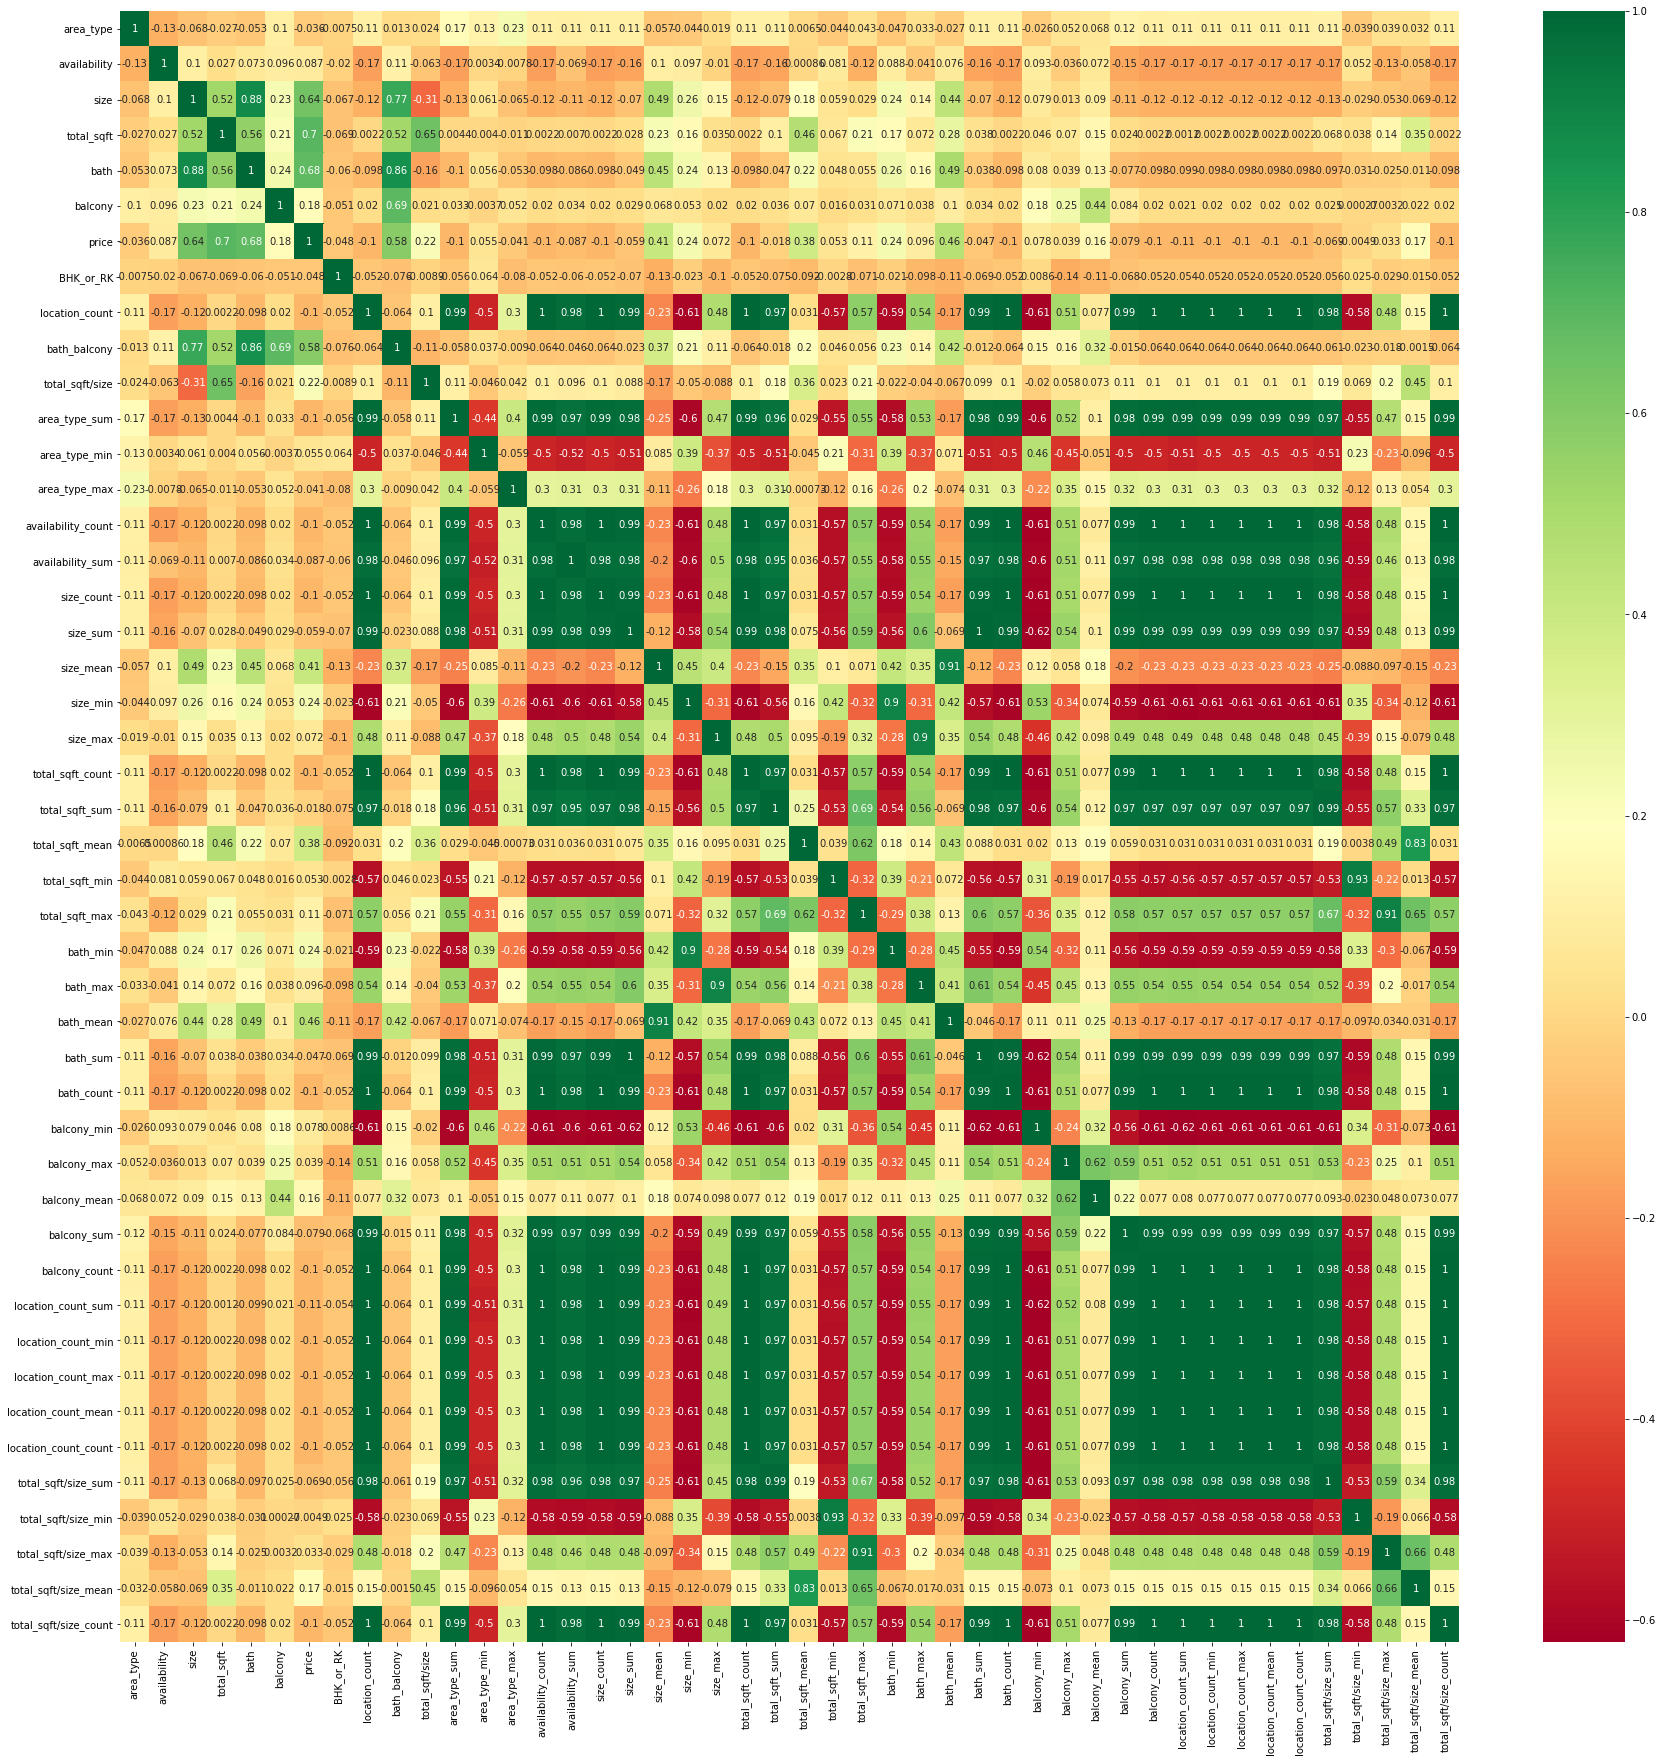

In [59]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(),annot = True , cmap="RdYlGn")

In [60]:
X = train_df.drop(labels=['price'], axis=1)
y = train_df['price'].values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [62]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [63]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1500,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5077
[LightGBM] [Info] Number of data points in the train set: 9984, number of used features: 45
[LightGBM] [Info] Start training from score 4.411410
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.304065
[200]	valid_0's rmse: 0.292396
[300]	valid_0's rmse: 0.287883
[400]	valid_0's rmse: 0.284946
[500]	valid_0's rmse: 0.283722
[600]	valid_0's rmse: 0.282747
[700]	valid_0's rmse: 0.282468
Early stopping, best iteration is:
[657]	valid_0's rmse: 0.282204
RMSLE: 0.28220444295124364


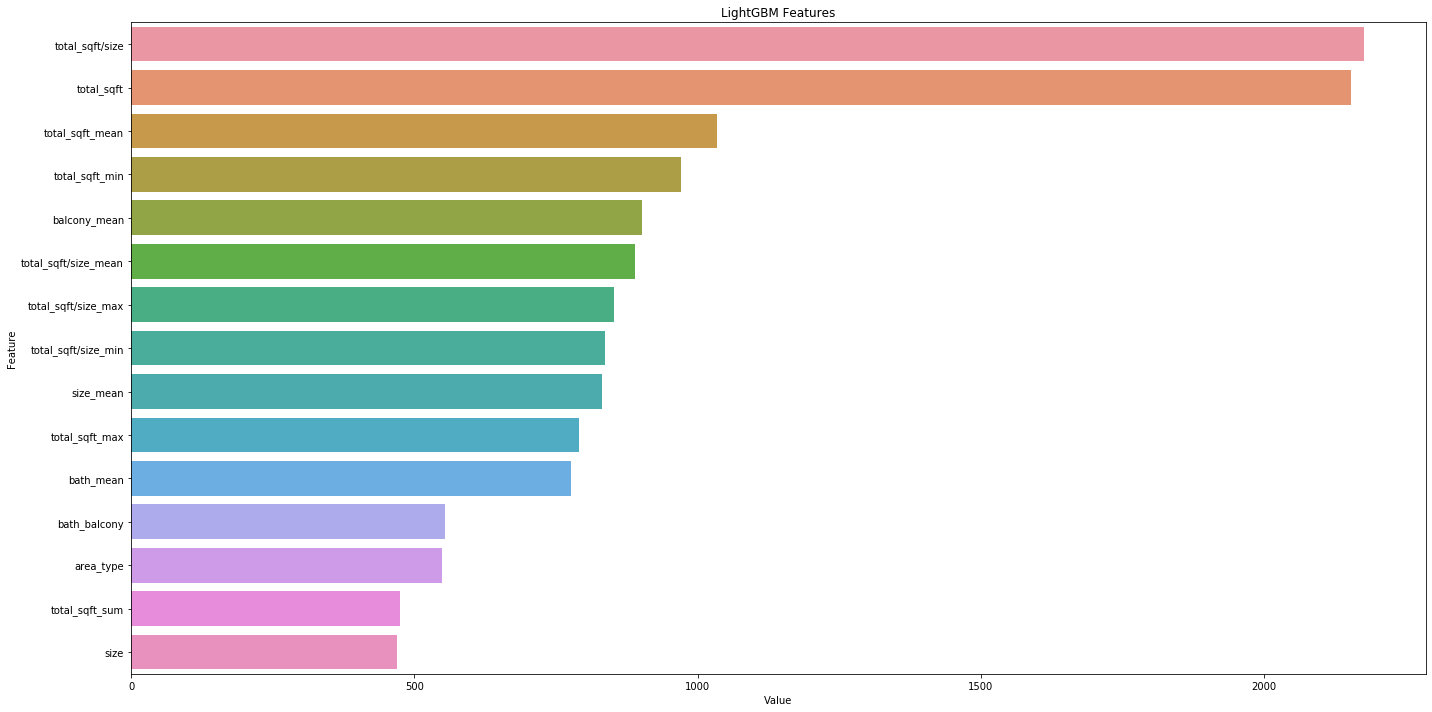

In [64]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:15], 
                           columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

###### Predicting on test data

In [65]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65
         }

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=50)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))
    p = lgbm.predict(test_df)
    
    y_pred_totlgb.append(p)

[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
RMSLE LGBM:  0.2643178960695073
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_data_in_l

RMSLE LGBM:  0.27654227825390826
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
RMSLE LGBM:  0.2719814443999238


In [66]:
np.mean(errlgb)

0.2799714305030941

In [67]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))

In [68]:
submission=pd.DataFrame()
submission["price"]=lgbm_final

In [69]:
submission.to_csv("submission.csv",index=False)